In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [4]:
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win"
                                       )

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )

Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
skipping  2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fix

In [5]:
training_data.keys()

dict_keys([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.7

In [6]:
modules_to_reload = [
    'models.xg_boost',
    'models.Model'
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
import process_data

from models.xg_boost import setup_xgboost_models
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]
models = setup_xgboost_models(training_data, validation_data, numeric_features = numeric_features, other_features = other_features, all_features = features, optimize_hyperparams=False, use_calibration=True)


/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Timestep 0.00%(Calibrated): Training Loss = 0.3751, Accuracy = 0.6249, Validation Loss = 0.2161, Validation Accuracy = 0.6540
Timestep 0.50%(Calibrated): Training Loss = 0.3451, Accuracy = 0.6549, Validation Loss = 0.2239, Validation Accuracy = 0.6290
Timestep 1.00%(Calibrated): Training Loss = 0.3427, Accuracy = 0.6573, Validation Loss = 0.2179, Validation Accuracy = 0.6330
Timestep 1.50%(Calibrated): Training Loss = 0.3524, Accuracy = 0.6476, Validation Loss = 0.2208, Validation Accuracy = 0.6250
Timestep 2.00%(Calibrated): Training Loss = 0.3764, Accuracy = 0.6236, Validation Loss = 0.2335, Validation Accuracy = 0.5882
Timestep 2.50%(Calibrated): Training Loss = 0.3801, Accuracy = 0.6199, Validation Loss = 0.2116, Validation Accuracy = 0.6487
Timestep 3.00%(Calibrated): Training Loss = 0.3141, Accuracy = 0.6859, Validation Loss = 0.2180, Validation Accuracy = 0.6404
Timestep 3.50%(Calibrated): Training Loss = 0.3505, Accuracy = 0.6495, Validation Loss = 0.2282, Validation Accuracy =

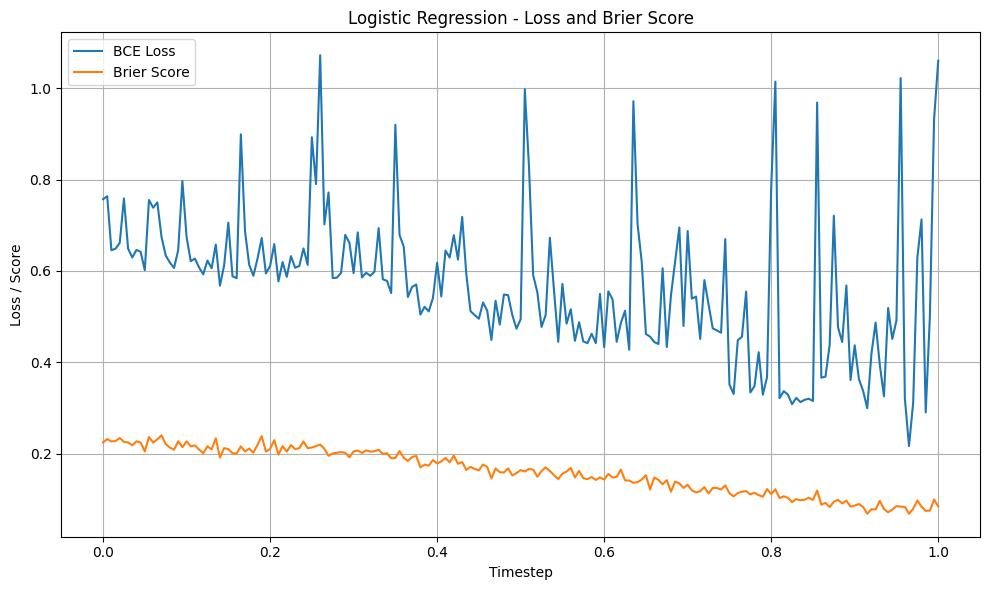

In [32]:
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")

In [7]:
%load_ext autoreload
%autoreload 2

In [ ]:
%reload_ext autoreload
from models.utils import SHAP_analysis


SHAP_analysis(models, training_data, test_data, "XGBoost", "shap_values/XGBoost", num_threads = 1)

Processing 201 timesteps (skipping 0 already done).


PermutationExplainer explainer: 277it [00:28,  6.72it/s]                         


Saved XGBoost_0.0.npz
Saved XGBoost_0.005.npz


PermutationExplainer explainer: 282it [00:21,  7.14it/s]                         


Saved XGBoost_0.01.npz


PermutationExplainer explainer: 307it [00:25,  7.47it/s]                         


Saved XGBoost_0.015.npz


PermutationExplainer explainer: 290it [00:12,  4.25it/s]                         


Saved XGBoost_0.02.npz


PermutationExplainer explainer: 316it [00:25,  7.75it/s]                         


Saved XGBoost_0.025.npz


PermutationExplainer explainer: 306it [00:24,  7.34it/s]                         


Saved XGBoost_0.03.npz


PermutationExplainer explainer: 319it [00:13,  4.03it/s]                         


Saved XGBoost_0.035.npz


PermutationExplainer explainer: 337it [00:16,  7.81it/s]                         


Saved XGBoost_0.04.npz


PermutationExplainer explainer: 312it [00:20,  8.29it/s]                         


Saved XGBoost_0.045.npz


PermutationExplainer explainer: 336it [00:22,  8.14it/s]                         


Saved XGBoost_0.05.npz


PermutationExplainer explainer: 365it [00:25,  8.68it/s]                         


Saved XGBoost_0.055.npz


PermutationExplainer explainer: 334it [00:22,  8.01it/s]                         


Saved XGBoost_0.06.npz


PermutationExplainer explainer: 335it [00:31,  7.43it/s]                         


Saved XGBoost_0.065.npz


PermutationExplainer explainer: 339it [00:37,  5.59it/s]                         


Saved XGBoost_0.07.npz


PermutationExplainer explainer: 343it [00:38,  6.66it/s]                         


Saved XGBoost_0.075.npz


PermutationExplainer explainer: 343it [00:27,  8.37it/s]                         


Saved XGBoost_0.08.npz


PermutationExplainer explainer: 335it [00:31,  7.43it/s]                         


Saved XGBoost_0.085.npz


PermutationExplainer explainer: 360it [00:21,  9.02it/s]                         


Saved XGBoost_0.09.npz


PermutationExplainer explainer: 358it [00:34,  7.33it/s]                         


Saved XGBoost_0.095.npz


PermutationExplainer explainer: 354it [00:29,  7.87it/s]                         


Saved XGBoost_0.1.npz


PermutationExplainer explainer: 343it [00:47,  5.51it/s]                         


Saved XGBoost_0.105.npz


PermutationExplainer explainer: 347it [00:32,  7.16it/s]                         


Saved XGBoost_0.11.npz


PermutationExplainer explainer: 342it [00:28,  7.87it/s]                         


Saved XGBoost_0.115.npz


PermutationExplainer explainer: 340it [00:38,  6.71it/s]                         


Saved XGBoost_0.12.npz


PermutationExplainer explainer: 352it [00:23,  8.69it/s]                         


Saved XGBoost_0.125.npz


PermutationExplainer explainer: 319it [00:35,  6.03it/s]                         


Saved XGBoost_0.13.npz


PermutationExplainer explainer: 335it [00:53,  5.48it/s]                         


Saved XGBoost_0.135.npz


PermutationExplainer explainer:  66%|██████▋   | 234/352 [00:28<00:14,  8.15it/s]

KeyboardInterrupt: 

PermutationExplainer explainer:  67%|██████▋   | 235/352 [00:28<00:20,  5.70it/s]

PermutationExplainer explainer:  86%|████████▌ | 302/352 [00:36<00:08,  5.71it/s]Exception ignored in: <function tqdm.__del__ at 0x1572b1dc0>
Traceback (most recent call last):
  File "/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/tqdm/std.py", line 1302, in close
    self.display(pos=0)
  File "/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/tqdm/std.py", line 1495, in display
    self.sp(self.__str__() if msg is None else msg)
  File "/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/tqdm/std.py", line 459, in print_status
    fp_write('\r' + s + (' ' * max(last_len[0] - len_s, 0)))
  File "/Users/aly/Documents/University_of_Waterloo/Winter 2025/Res

In [30]:
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "xgboost_phat_b_model")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces